In [3]:
import pyfolio as pf
import pandas as pd
pd.options.plotting.backend
from pathlib import Path
import os
import numpy as np
from matplotlib.dates import DateFormatter

Start date,2015-01-02
End date,2020-12-31
Total months,71
,Backtest
Annual return,15.162%
Cumulative returns,133.133%
Annual volatility,21.313%
Sharpe ratio,0.77
Calmar ratio,0.41
Stability,0.86
Max drawdown,-37.263%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,37.26,2020-02-19,2020-03-23,2020-06-10,81
1,23.40,2018-10-03,2018-12-24,2019-07-03,196
2,19.68,2015-07-20,2016-01-20,2016-05-25,223
3,12.62,2019-07-23,2019-10-08,2020-01-13,125
4,12.26,2020-09-02,2020-09-23,NaT,NaN


/usr/local/lib/python3.7/dist-packages/pyfolio/tears.py:907: UserWarning: Passed returns do not overlap with anyinteresting times.
  'interesting times.', UserWarning)


Top 10 long positions of all time,max
sid,
XLK,105.60%
XLB,103.45%
EFA,75.94%
XLP,9.18%
IYZ,6.87%
IWR,3.82%
XLV,3.74%
VNQ,3.74%
VTV,3.72%


Top 10 short positions of all time,max
sid,


Top 10 positions of all time,max
sid,
XLK,105.60%
XLB,103.45%
EFA,75.94%
XLP,9.18%
IYZ,6.87%
IWR,3.82%
XLV,3.74%
VNQ,3.74%
VTV,3.72%


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Summary stats,All trades,Short trades,Long trades
Total number of round_trips,5005.00,1.00,5004.00
Percent profitable,0.55,0.00,0.55
Winning round_trips,2737.00,0.00,2737.00
Losing round_trips,2213.00,0.00,2213.00
Even round_trips,55.00,1.00,54.00


PnL stats,All trades,Short trades,Long trades
Total profit,$133133.05,$0.00,$133133.05
Gross profit,$711223.36,$0.00,$711223.36
Gross loss,$-578090.31,$0.00,$-578090.31
Profit factor,$1.23,$nan,$1.23
Avg. trade net profit,$26.60,$0.00,$26.61
Avg. winning trade,$259.86,$nan,$259.86
Avg. losing trade,$-261.22,$nan,$-261.22
Ratio Avg. Win:Avg. Loss,$0.99,$nan,$0.99
Largest winning trade,$12068.00,$0.00,$12068.00
Largest losing trade,$-23259.57,$0.00,$-23259.57


Duration stats,All trades,Short trades,Long trades
Avg duration,2 days 11:15:12.767032967,0 days 20:59:59,2 days 11:15:40.287769784
Median duration,1 days 00:00:00,0 days 20:59:59,1 days 00:00:00
Longest duration,26 days 00:00:00,0 days 20:59:59,26 days 00:00:00
Shortest duration,0 days 20:59:59,0 days 20:59:59,0 days 21:00:00


Return stats,All trades,Short trades,Long trades
Avg returns all round_trips,0.02%,0.03%,0.02%
Avg returns winning,0.17%,0.03%,0.17%
Avg returns losing,-0.17%,nan%,-0.17%
Median returns all round_trips,0.00%,0.03%,0.00%
Median returns winning,0.01%,0.03%,0.01%
Median returns losing,-0.01%,nan%,-0.01%
Largest winning trade,9.33%,0.03%,9.33%
Largest losing trade,-13.54%,0.03%,-13.54%


Symbol stats,AGG,EEM,EFA,EWJ,EZU,IEF,ILF,IVV,IWR,IYR,IYZ,QID,QLD,SDS,SHY,SPY,SPYG,SSO,TLT,VBR,VNQ,VTI,VTV,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY
Avg returns all round_trips,0.05%,0.01%,0.00%,-0.05%,0.01%,0.02%,0.07%,0.00%,0.01%,-0.02%,0.02%,0.00%,0.05%,0.08%,0.04%,0.07%,0.04%,0.04%,-0.01%,0.03%,0.00%,-0.00%,-0.12%,0.02%,-0.01%,-0.02%,0.03%,-0.00%,0.03%,0.11%,0.04%,0.06%
Avg returns winning,0.16%,0.24%,0.06%,0.19%,0.44%,0.14%,0.31%,0.02%,0.04%,0.04%,0.09%,0.04%,0.11%,0.18%,0.12%,0.12%,0.12%,0.06%,0.14%,0.30%,0.10%,0.10%,0.10%,0.18%,0.10%,0.08%,0.07%,0.09%,0.82%,0.34%,0.53%,0.16%
Avg returns losing,-0.18%,-0.15%,-0.07%,-0.44%,-0.46%,-0.10%,-0.16%,-0.03%,-0.02%,-0.09%,-0.03%,-0.03%,-0.07%,-0.10%,-0.13%,-0.02%,-0.10%,-0.02%,-0.42%,-0.24%,-0.10%,-0.19%,-0.37%,-0.16%,-0.19%,-0.14%,-0.04%,-0.08%,-0.64%,-0.21%,-0.60%,-0.14%
Median returns all round_trips,0.00%,-0.00%,0.00%,0.00%,0.00%,-0.00%,0.00%,0.00%,0.00%,0.00%,-0.00%,-0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,-0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,-0.00%,-0.00%,0.00%,0.00%,0.00%
Median returns winning,0.00%,0.01%,0.00%,0.04%,0.03%,0.01%,0.01%,0.01%,0.01%,0.01%,0.01%,0.00%,0.01%,0.02%,0.00%,0.00%,0.00%,0.01%,0.00%,0.01%,0.01%,0.01%,0.01%,0.01%,0.00%,0.02%,0.01%,0.00%,0.01%,0.00%,0.04%,0.00%
Median returns losing,-0.00%,-0.01%,-0.01%,-0.02%,-0.02%,-0.01%,-0.00%,-0.01%,-0.00%,-0.05%,-0.01%,-0.00%,-0.01%,-0.02%,-0.00%,-0.00%,-0.00%,-0.00%,-0.01%,-0.01%,-0.01%,-0.01%,-0.00%,-0.01%,-0.00%,-0.00%,-0.01%,-0.00%,-0.04%,-0.00%,-0.22%,-0.01%
Largest winning trade,2.20%,2.85%,2.44%,2.26%,3.11%,2.83%,3.47%,0.10%,0.94%,1.14%,1.42%,1.32%,3.76%,3.32%,1.58%,1.35%,3.07%,1.07%,3.72%,3.19%,1.21%,3.08%,1.38%,6.03%,2.52%,2.01%,1.33%,4.21%,9.33%,4.08%,3.79%,2.88%
Largest losing trade,-1.62%,-2.43%,-1.30%,-7.60%,-10.58%,-1.30%,-3.46%,-0.51%,-0.68%,-1.11%,-0.87%,-0.51%,-2.00%,-0.92%,-1.67%,-0.44%,-1.42%,-0.13%,-4.37%,-3.23%,-2.08%,-1.46%,-6.11%,-5.21%,-2.74%,-2.25%,-0.78%,-12.59%,-13.54%,-4.34%,-3.35%,-0.93%


Profitability (PnL / PnL total) per name,
symbol,
XLK,114.04%
SDS,0.22%
QID,0.14%
XLF,0.11%
TLT,0.09%
EFA,0.07%
XLY,0.04%
EWJ,0.02%
SHY,0.02%


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


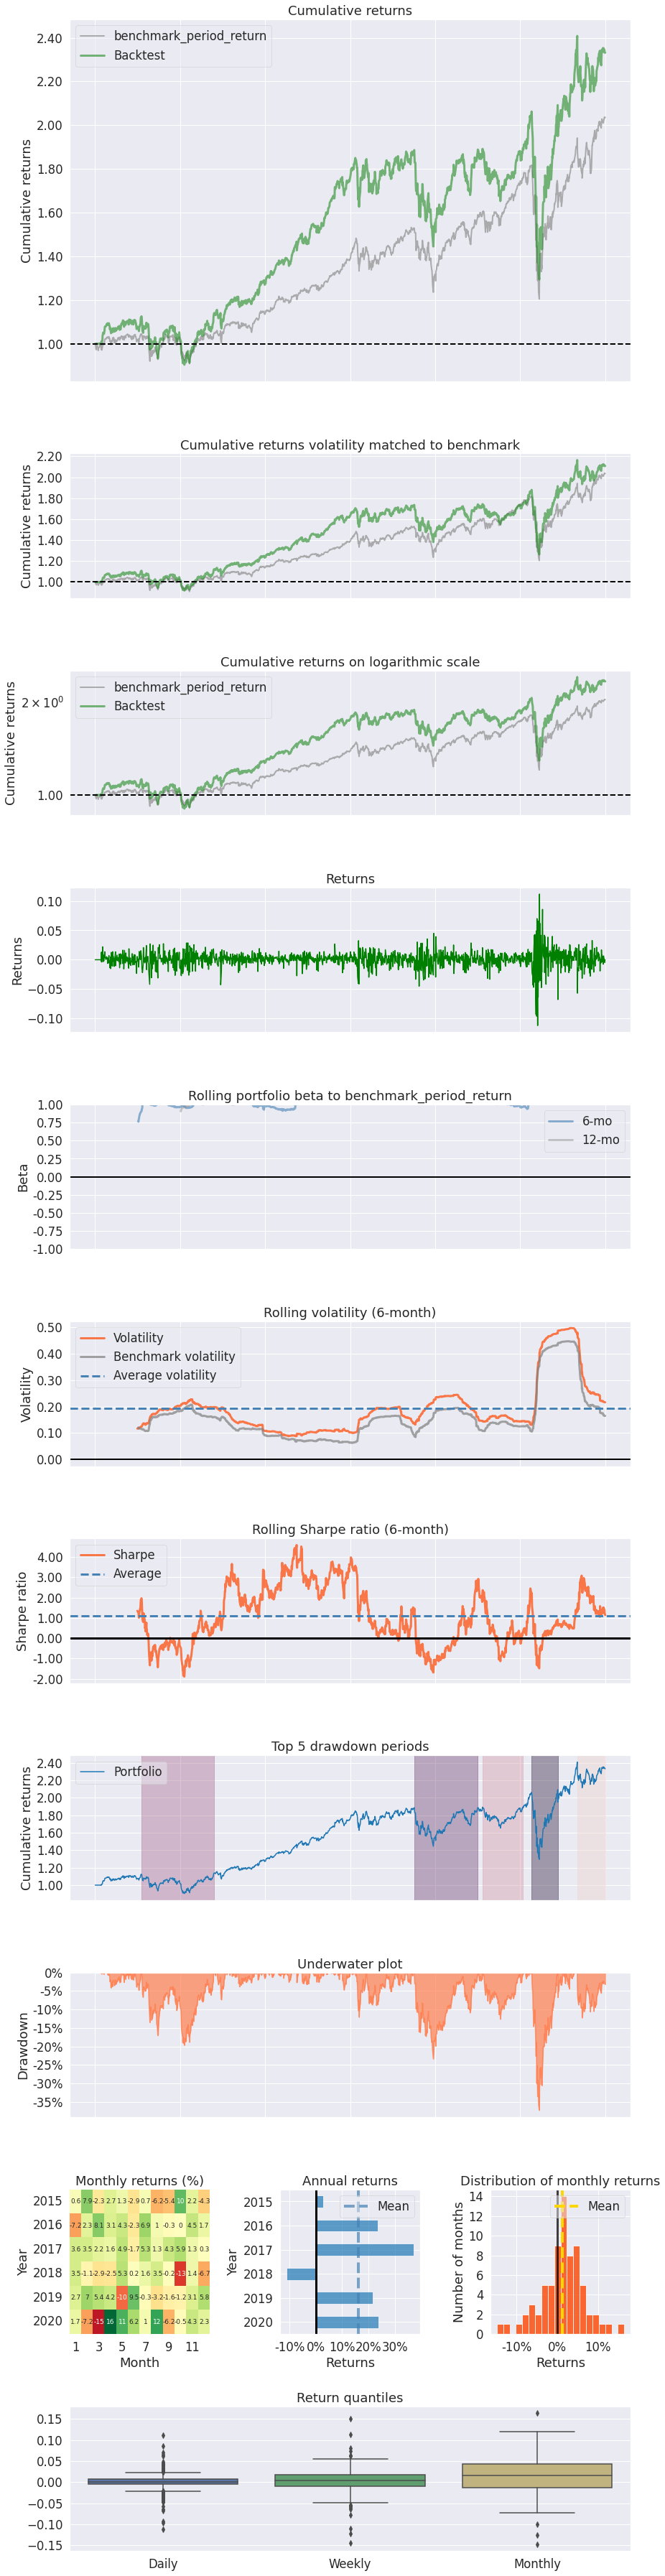

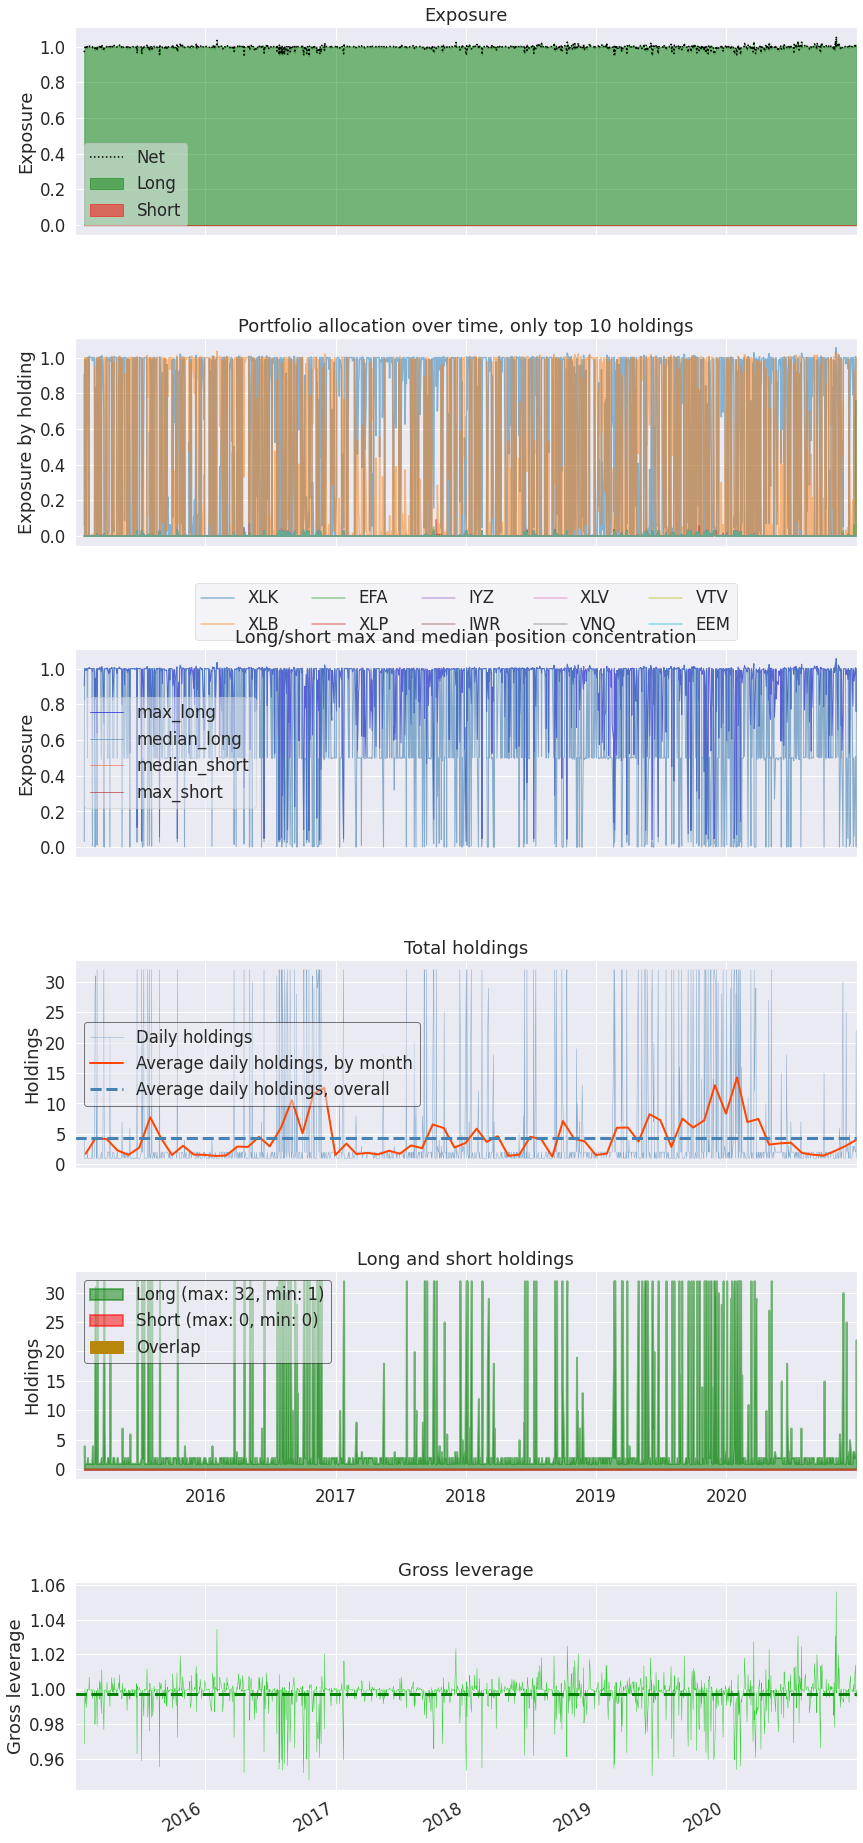

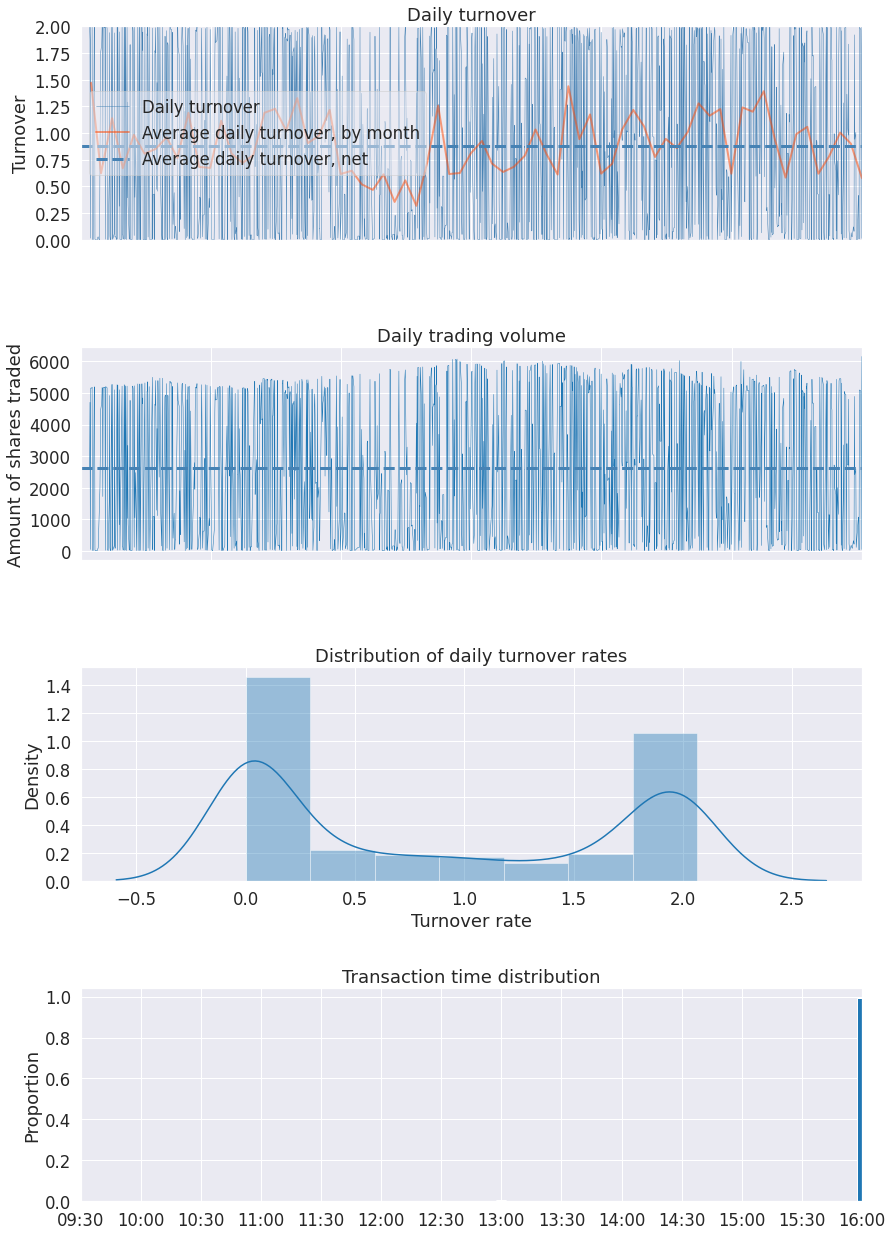

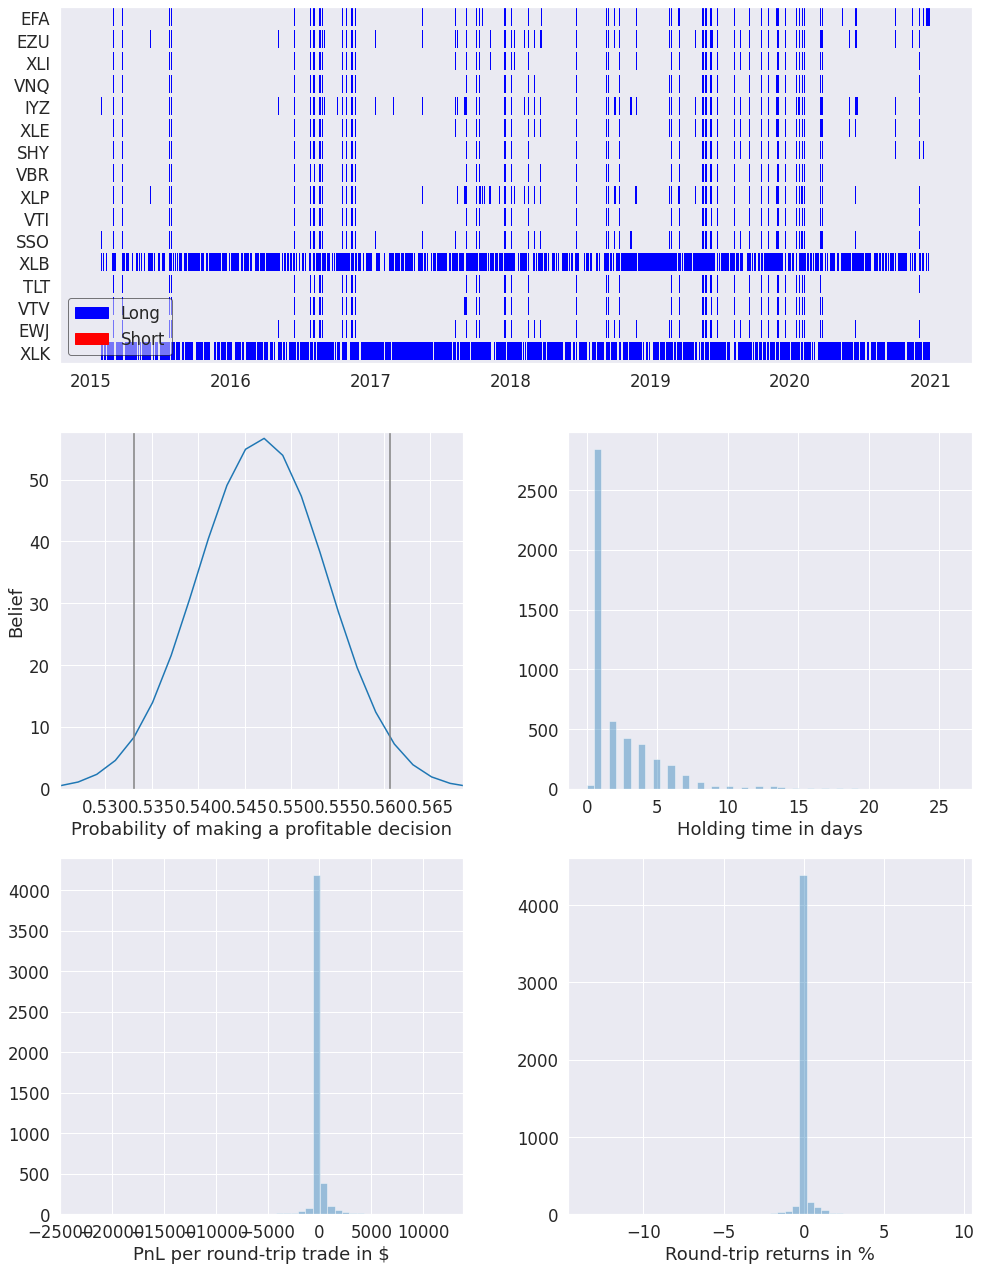

In [4]:
results = pd.read_pickle(Path(Path.cwd(),'run_test_20210919_180742.pkl'))
returns, positions, transactions = pf.utils.extract_rets_pos_txn_from_zipline(results)
benchmark_period_return = results['benchmark_period_return']
daily_benchmark_returns = np.exp(np.log(benchmark_period_return + 1.0).diff()) - 1
pf.create_full_tear_sheet(returns, positions=positions, benchmark_rets=daily_benchmark_returns,transactions=transactions,round_trips=True)

In [5]:
import plotly.express as px
positions_percent = pf.pos.get_percent_alloc(positions)
positions_percent.columns = positions_percent.columns.map(pf.utils.format_asset)

df_top_long, df_top_short, df_top_abs = pf.pos.get_top_long_short_abs(positions_percent)

df = positions_percent
df_plot = pd.melt(df.reset_index().resample('M', on='index').mean().reset_index(), id_vars='index', value_vars=df.columns)
fig = px.bar(df_plot, x='index', y='value', color='sid',barmode = 'stack',labels={'index':'Year','value':'Percent'},title="Portfolio Weights")

fig.update_xaxes(
    dtick="M1",
    tickformat="%b\n%Y")
fig.update_layout({'legend_orientation':'h'})
fig.show()

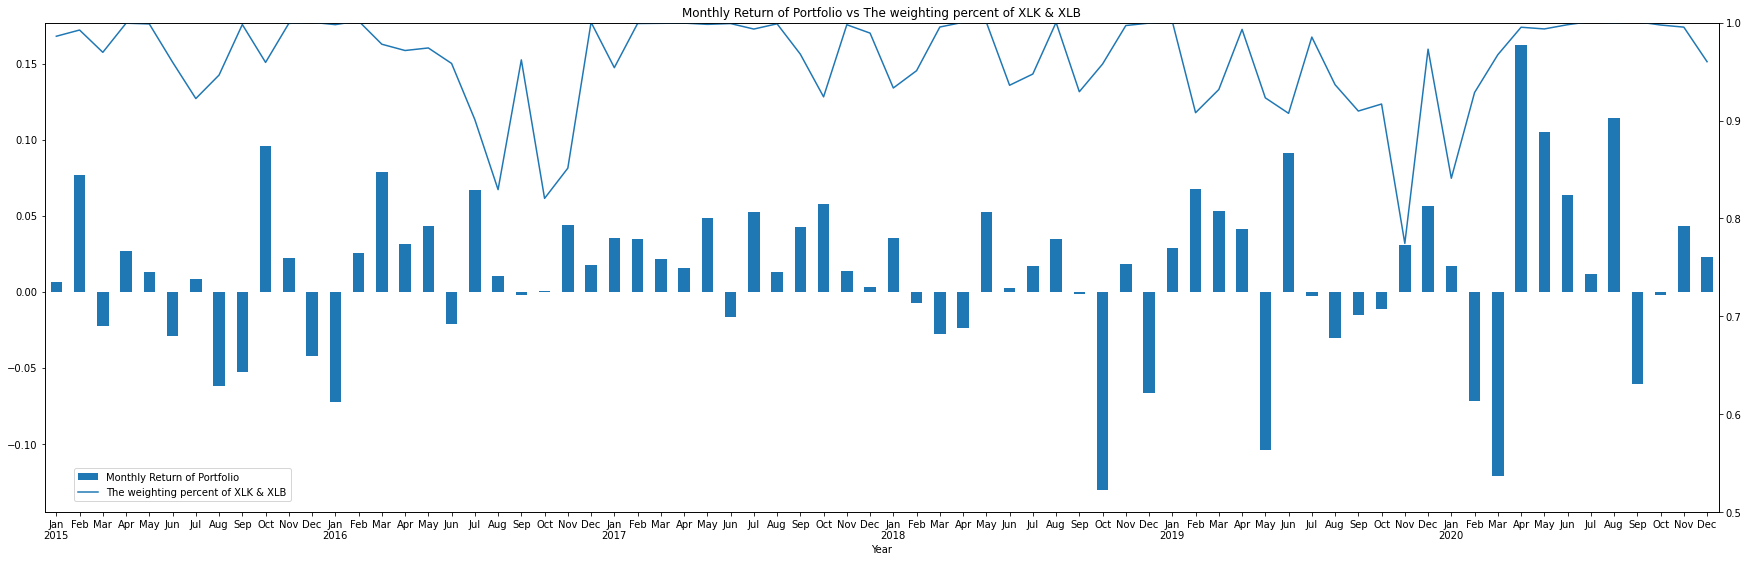

In [6]:
positions_percent_major = positions_percent.loc[:,['XLK','XLB']]
positions_percent_major['sum_major_percent'] = positions_percent_major.loc[:,['XLK','XLB']].sum(axis=1)
monthly_returns = returns.reset_index().resample('M', on='index').sum()

ax = monthly_returns.plot.bar(figsize=(30,10))
positions_percent_major['sum_major_percent'].reset_index().resample('M', on='index').mean().plot(figsize=(30,10),secondary_y=True,ax=ax,use_index=False)
ax.right_ax.set_ylim(0.5,1)
ax.set_title("Monthly Return of Portfolio vs The weighting percent of XLK & XLB",color='black')

h1, l1 = ax.get_legend_handles_labels()
h2, l2 = ax.right_ax.get_legend_handles_labels()
l1 = ['Monthly Return of Portfolio']
l2 = ['The weighting percent of XLK & XLB']

ax.legend(h1+h2, l1+l2,bbox_to_anchor=(0.15, 0.1))
ax.set_xlabel('Year')

ax.set_xticks(range(monthly_returns.index.size))
ax.set_xticklabels([ts.strftime('%b\n%Y') if ts.year != monthly_returns.index[idx-1].year
                    else ts.strftime('%b') for idx, ts in enumerate(monthly_returns.index)])
ax.figure.autofmt_xdate(rotation=0, ha='center');

In [ ]:
!jupyter nbconvert --to html Evaluate_pyfolio_2021_09_19.ipynb

[NbConvertApp] Converting notebook Evaluate_pyfolio_2021_08_31.ipynb to html
[NbConvertApp] Writing 2331407 bytes to Evaluate_pyfolio_2021_08_31.html
